In [65]:
import tensorflow as tf
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv
import os


In [66]:
Stock_ID='2330'
file_name='2330.csv'
count=0
delete=0
f = open('TSE1.csv', 'r')
if os.path.exists(file_name)==False:
    for row in csv.reader(f):
        if(row[1]==Stock_ID or row[1]=='證券代號'):            
            if os.path.exists(file_name)==False:
                out= open(file_name,'w',newline='')
            else:
                out= open(file_name,'a',newline='')
            csv_write=csv.writer(out,dialect='excel')
            if(row[6]!='--'):
                #print(row)
                csv_write.writerow(row)
                count=count+1
            else:
                delete=delete+1
    print(count,delete)
f.close()


In [67]:
menu= pd.read_csv(file_name,encoding = "cp950")
menu.tail()


,日期,證券代號,證券名稱,成交股數,成交筆數,成交金額,開盤價,最高價,最低價,收盤價,漲跌(+/-),漲跌價差,最後揭示買價,最後揭示買量,最後揭示賣價,最後揭示賣量,本益比
1129,20170811,2330,台積電,41592129,13751,8803564627,211.0,213.5,210.5,212.5,-,1.5,212,1568,212.5,388,15.71
1130,20170814,2330,台積電,29414616,7719,6233486198,213.5,214.0,210.0,211.0,-,1.5,211,618,211.5,63,15.59
1131,20170815,2330,台積電,14385915,5250,3073117310,213.0,214.5,213.0,214.0,+,3.0,213.5,33,214,1518,15.82
1132,20170816,2330,台積電,25206990,8610,5357190370,214.5,214.5,211.0,213.0,-,1.0,212.5,14,213,72,15.74
1133,20170817,2330,台積電,8353232,3120,1785167148,213.5,214.0,213.0,214.0,+,1.0,213.5,1160,214,94,15.82


In [68]:
menu.shape

(1134, 17)

In [69]:
data=pd.concat([menu['開盤價'],menu['最高價'],menu['最低價'],menu['收盤價'],menu['成交股數']],axis=1)
data.head()

,開盤價,最高價,最低價,收盤價,成交股數
0,97.6,99.9,97.1,99.6,40647121
1,100.5,102.0,100.0,101.0,44335846
2,100.5,101.5,100.0,101.5,39502577
3,101.0,101.0,99.1,100.5,42328657
4,99.6,100.0,98.9,99.7,31218717


In [70]:
data.shape

(1134, 5)

## Inputs Data

In [71]:
def modified(dataset):
    numlist=[]
    for i in range(len(dataset)):
        if (i+1)<len(dataset):
            #print(type(dataset[i]))
            ave= (dataset[i+1]-dataset[i])/dataset[i]
            #print(type(ave))
            numlist.append(ave)
    numlist=np.array(numlist,dtype='float32')
    return numlist


In [72]:
def difference(dataset):
    numlist=[]
    dataset=np.array(dataset)
    for i in range(len(dataset)):
        if(i+1)<len(dataset):
            dif= dataset[i+1]-dataset[i]
            #print(dataset[i+1], dataset[i], dif)
            numlist.append(dif)
    numlist=np.array(numlist, dtype='float32')
    return numlist


In [73]:
def create_dataset(dataset, look_back=1):

    dataX = []
    
    for i in range(len(dataset)-look_back+1):
            dataX.append(dataset[i:(i+look_back),:])

    return np.array(dataX)

In [74]:
def markupdown(dataset):
    ar=[]
    for i in range (len(dataset)):
        if dataset[i]<0:
            ar.append([1,0])
        else:
            ar.append([0,1])
        #print('ar= ',ar)
    return np.array(ar)

In [75]:
def getmax(array):
    maxi=np.amax(array)
    return maxi 

In [76]:
look_back=5
col=5

### Data X Y

In [77]:
x=pd.concat([menu['開盤價'],menu['最高價'],menu['最低價'],menu['收盤價']],axis=1)
x=np.array(x)
#x=x.astype('float')
#x=np.fromstring(x, dtype=float, sep=' ')
#print(x)

x=modified(x)
print(x[0:5], x.shape)
x=x+0.1    #modified +0.1
print(x[0:5],np.amax(x))

[[ 0.02971311  0.02102102  0.02986612  0.01405623]
 [ 0.         -0.00490196  0.          0.00495049]
 [ 0.00497512 -0.00492611 -0.009      -0.00985222]
 [-0.01386139 -0.00990099 -0.00201816 -0.0079602 ]
 [ 0.00903614  0.005       0.00303337  0.00300903]] (1133, 4)
[[ 0.12971312  0.12102102  0.12986612  0.11405623]
 [ 0.1         0.09509804  0.1         0.1049505 ]
 [ 0.10497513  0.09507389  0.09100001  0.09014779]
 [ 0.08613861  0.09009901  0.09798184  0.0920398 ]
 [ 0.10903615  0.105       0.10303337  0.10300903]] 0.173913


In [78]:
volume=pd.concat([menu['成交股數']],axis=1)
days=20
print(volume.shape)
volume=np.array(volume)
vol_data=[]
array=np.zeros(shape=(days,1))
for i in range(0,len(volume)):
    num=i%days
    array[num]=volume[i]
    maxi= getmax(array)
    vol_data.append((volume[i]/maxi)*0.2)
    #print(volume[i],maxi)
    #print(vol_data)
vol_data=np.array(vol_data)
vol_data=vol_data[1:len(vol_data)]
print(vol_data[0:5],vol_data.shape)    


(1134, 1)
[[ 0.2       ]
 [ 0.17819701]
 [ 0.19094553]
 [ 0.14082834]
 [ 0.11916886]] (1133, 1)


In [79]:
x=np.append(x,vol_data,axis=1)
x_data =create_dataset(x,look_back)
print(x_data[0:5],x_data.shape)

[[[ 0.12971312  0.12102102  0.12986612  0.11405623  0.2       ]
  [ 0.1         0.09509804  0.1         0.1049505   0.17819701]
  [ 0.10497513  0.09507389  0.09100001  0.09014779  0.19094553]
  [ 0.08613861  0.09009901  0.09798184  0.0920398   0.14082834]
  [ 0.10903615  0.105       0.10303337  0.10300903  0.11916886]]

 [[ 0.1         0.09509804  0.1         0.1049505   0.17819701]
  [ 0.10497513  0.09507389  0.09100001  0.09014779  0.19094553]
  [ 0.08613861  0.09009901  0.09798184  0.0920398   0.14082834]
  [ 0.10903615  0.105       0.10303337  0.10300903  0.11916886]
  [ 0.09402985  0.10497513  0.10302419  0.11        0.186009  ]]

 [[ 0.10497513  0.09507389  0.09100001  0.09014779  0.19094553]
  [ 0.08613861  0.09009901  0.09798184  0.0920398   0.14082834]
  [ 0.10903615  0.105       0.10303337  0.10300903  0.11916886]
  [ 0.09402985  0.10497513  0.10302419  0.11        0.186009  ]
  [ 0.11601602  0.1049505   0.11005025  0.1         0.10372578]]

 [[ 0.08613861  0.09009901  0.0979

In [80]:
#scaler = MinMaxScaler(feature_range=(0,1))
#x= scaler.fit_transform(x)
#x=preprocessing.normalize(x,norm='l2')


In [81]:
y=pd.concat([menu['收盤價']],axis=1)
y=y.values
y=difference(y)
y_data= markupdown(y)
#print(y[0:6])
print(y_data[0:5],y_data.shape)

[[0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]] (1133, 2)


### Data Split

In [82]:
train_size= int(len(x_data)*0.8)
test_size= len(x_data)-train_size

In [83]:
x_train,x_test= x_data[0:train_size,:],x_data[train_size:len(x_data),:]
x_test=x_test[0:len(x_test)-1]

In [84]:
print(x_train.shape, x_test.shape)

(903, 5, 5) (225, 5, 5)


In [85]:
x_train=np.reshape(x_train, (-1, look_back*col))
x_test=np.reshape(x_test,(-1, look_back*col))
#scaler = MinMaxScaler(feature_range=(0,1))
#x_train= scaler.fit_transform(x_train)
#x_test= scaler.fit_transform(x_test)
print(x_train.shape, x_test.shape)

(903, 25) (225, 25)


In [86]:
y_data=y_data[look_back:,:]
y_train,y_test= y_data[0:train_size,:],y_data[train_size:len(y_data),:]

In [87]:
print(y_train.shape, y_test.shape)

(903, 2) (225, 2)


## Train Model

In [88]:
def layer(output_dim,input_dim,inputs,activation):
    w=tf.Variable(tf.random_normal([input_dim,output_dim]))
    b=tf.Variable(tf.random_normal([1,output_dim]))
    xwb=tf.matmul(inputs,w)+b
    if activation is None:
        outputs=xwb
    else:
        outputs=activation(xwb)
    return outputs

In [89]:
x=tf.placeholder("float",[None,look_back*col])
h1=layer(output_dim=40, input_dim=look_back*col, inputs=x, activation=tf.nn.relu)
#h2=layer(output_dim=10, input_dim=80, inputs=h1,activation=tf.nn.relu)
y_predict=layer(output_dim=2, input_dim=40, inputs=h1, activation=None)

In [90]:
y_label=tf.placeholder("float",[None,2])
loss_fun=tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=y_predict, labels=y_label))
optimizer=tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_fun)

In [91]:
label=tf.argmax(y_label,1)
prediction=tf.argmax(y_predict,1)
correct_predict=tf.equal(label,prediction)
accuracy= tf.reduce_mean(tf.cast(correct_predict,"float"))

## Training

In [92]:
trainEpochs=500
batchsize=100
totalbatchs= int(len(x_data)//batchsize)

loss_train=[];epoch_list=[];accuracy_train=[]
loss_test=[]; accuracy_test=[]
from time import time
startTime=time()

sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [93]:
predict=[]
count=0
for epoch in range(trainEpochs):
    shuffle = np.random.permutation(len(y_train))
    x_train = x_train[shuffle]
    y_train = y_train[shuffle]
    for i in range(totalbatchs):
        sess.run(optimizer,feed_dict={x:x_train,y_label:y_train})
        
    loss_tra,acc_tra= sess.run([loss_fun, accuracy],feed_dict={x:x_train,y_label:y_train})
    loss_t,acc_t= sess.run([loss_fun, accuracy],feed_dict={x:x_test,y_label:y_test})
    
    pre= sess.run(y_predict,feed_dict={x:x_train,y_label:y_train})
    predict.append(pre)
    epoch_list.append(epoch);
    loss_test.append(loss_t)
    loss_train.append(loss_tra)
    accuracy_test.append(acc_t)
    accuracy_train.append(acc_tra)
    
    #print ("Train Epoch:",'%02d'%(epoch+1),"Loss=","{:.9f}".format(loss),"Accuracy=",acc)
duration=time()-startTime
print("Loss_train= ",loss_tra)
print ("Loss_test= ",loss_t)

print("Accuracy_train= ", acc_tra)
print("Accuracy_test= ", acc_t)

print("Train Finished takes:",duration)

Loss_train=  0.657764
Loss_test=  0.668768
Accuracy_train=  0.612403
Accuracy_test=  0.613333
Train Finished takes: 6.573199987411499


## Plot

In [94]:
%matplotlib inline
import matplotlib.pyplot as plt

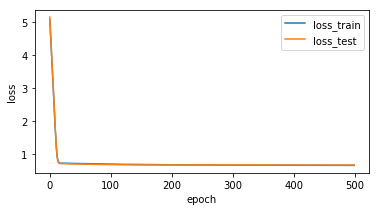

In [95]:
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,loss_train, label='loss_train')
plt.plot(epoch_list,loss_test, label='loss_test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend()

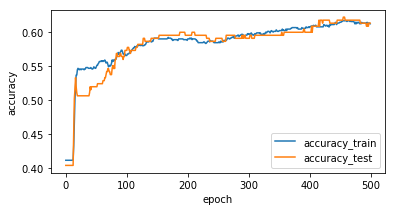

In [96]:
fig=plt.gcf()
fig.set_size_inches(6,3)
plt.plot(epoch_list,accuracy_train, label='accuracy_train')
plt.plot(epoch_list,accuracy_test, label='accuracy_test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend()
plt.show()